In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.patches as mpatches
%matplotlib inline

In [21]:
dff = df = pd.DataFrame.from_csv('fer2013.csv', index_col=None)
fer = input_data.rea
df.shape

(35887, 3)

In [22]:
cv = df.drop([int(k) for k in range(28709)]) #PublicTest
cv = cv.drop([int(k) for k in range(32298, 35887)]) #PublicTest 28709,32297
test = df.drop([int(k) for k in range(32298)]) #PrivateTest

In [23]:
df = df.drop([int(k) for k in range(28709,35887)]) #Test

In [24]:
y_train = df.emotion
y_cv = cv.emotion
y_test = test.emotion

In [25]:
df = df.drop('emotion', axis = 1)
df = df.drop('Usage', axis = 1)
cv = cv.drop('emotion', axis = 1)
cv = cv.drop('Usage', axis = 1)
test = test.drop('emotion', axis = 1)
test = test.drop('Usage', axis = 1)

In [26]:
nparr = np.zeros((28709, 2304))
nparr1 = np.zeros((3589, 2304))
nparr2 = np.zeros((3589, 2304))

In [27]:
for i in range(28709):
    df.pixels[i] = [int(j) for j in df.pixels[i].split()]
    nparr[i] = np.array(df.pixels[i])

In [28]:
maindf = pd.DataFrame(nparr, columns=[int(i) for i in range(2304)])
X = maindf

In [29]:
for i in range(28709,32298):#public
    cv.pixels[i] = [int(j) for j in cv.pixels[i].split()]
    nparr1[i-28709] = np.array(cv.pixels[i])

In [30]:
maincv = pd.DataFrame(nparr1, columns=[int(i) for i in range(2304)])
X_cv = maincv

In [31]:
for i in range(32298,35887):#private
    test.pixels[i] = [int(j) for j in test.pixels[i].split()]
    nparr2[i-32298] = np.array(test.pixels[i])

In [32]:
maintest = pd.DataFrame(nparr2, columns=[int(i) for i in range(2304)])
X_test = maintest

In [33]:
import tensorflow as tf

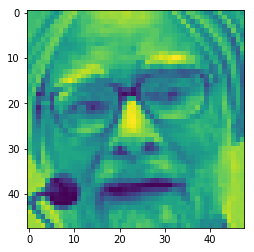

In [34]:
a = dff.pixels
arr1 = np.zeros((28709, 48,48))
for i in range (28709):
    b = [int(j) for j in a[i].split()]
    arr1[i] = np.array(b).reshape([48,48])
plt.imshow(arr1[1])  

In [35]:
x = tf.placeholder('float' , [None , 2304])
y = tf.placeholder('float')

In [36]:
n_h1 = 28709
n_h2 = 1000
n_h3 = 1000
n_classes = 7
batch_size = 100
def neural_network(data):
    hidden_l_1 = {'weights' :tf.Variable(tf.random_normal([2304 , n_h1])) , 'bias':tf.Variable(tf.random_normal([n_h1]))}
    hidden_l_2 = {'weights' :tf.Variable(tf.random_normal([n_h1 , n_h2])) , 'bias':tf.Variable(tf.random_normal([n_h2]))}
    hidden_l_3 = {'weights' :tf.Variable(tf.random_normal([n_h2 , n_h3])) , 'bias':tf.Variable(tf.random_normal([n_h3]))}
    output_l = {'weights' :tf.Variable(tf.random_normal([n_h3 , n_classes])) , 'bias':tf.Variable(tf.random_normal([n_classes]))}
    l1 = tf.add(tf.matmul(data,hidden_l_1['weights']) , hidden_l_1['bias'])    
    l1 = tf.nn.relu(l1)
    l2 = tf.add(tf.matmul(l1,hidden_l_2['weights']) , hidden_l_2['bias'])    
    l2 = tf.nn.relu(l2)
    l3 = tf.add(tf.matmul(l2,hidden_l_3['weights']) , hidden_l_3['bias'])    
    l3 = tf.nn.relu(l3)
    output = tf.matmul(l3,output_l['weights']) + output_l['bias']   
    return output

In [37]:
def training(X):
    prediction = neural_network(X)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction , labels=y))
    #                       learning_rate = 0.001
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    num_epochs = 50
    with tf.Session as sess:
        sess.run(tf.global_variables_initializer())
        
        for epochs in range(num_epochs):
            epochs_loss = 0
            for i in range(28709 // batch_size):
                ex = arr1.next_batch(batch_size)
                ey = y_train.next_batch(batch_size)
                _, c = session.run([optimizer, cost], feed_dict={
                    X: ex, y: ey})    
                epochs_loss += c
                
            print('Epoch', epochs, '/', num_epochs, 'loss', epochs_loss)
        
        correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
        accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
        print('Accuracy:', accuracy.eval({X: arr1,
                                          y: y_train}))

In [38]:
training(x)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



AttributeError: __exit__